In [37]:
%matplotlib inline
import matplotlib
#matplotlib.use('Agg')
import numpy as np 
import os
import matplotlib.pyplot as plt
import cPickle as pickle
import seaborn as sns
import pandas as pd
import utils
from SLIP_functions import compute_p_lysis_posterior, compute_inverse_MOI_posterior

In [23]:
def lytic_names(data_direc):
    file = open(os.path.join(data_direc, "lytic_hits.txt"), 'r')
    name_list = []
    for line in file:
        line = line[:-1]
        name_list.append(line)
    return name_list

In [24]:
def lyso_names(data_direc):
	file = open(os.path.join(data_direc, "lyso_hits.txt"), 'r')
	name_list = []
	for line in file:
		line = line[:-1]
		name_list.append(line)
	return name_list

In [25]:
def remove_neg(data_list):
	x_list = []
	y_list = []
	for i in range(len(data_list[0])):
		x_val = data_list[0][i]
		y_val = data_list[1][i]
		
		if x_val > -50.0 and y_val > -50.0:
			x_list.append(x_val)
			y_list.append(y_val)
	return [x_list,y_list]

In [26]:
#Set this to 'lyso' to display lysogeny-biased hits or 'lytic' to view lytic-biased hits
MODE = 'lyso'

In [27]:
root_direc = utils.ROOT_DIREC
pkl_direc = os.path.join(root_direc, 'pkl_files')
data_direc = os.path.join(root_direc, 'datatxt')

In [28]:
lytic_hits = lytic_names(data_direc)
lyso_hits = lyso_names(data_direc)

In [29]:
#Load all classified data from pkl file
pooled_file = open(os.path.join(pkl_direc, 'all_pooled_classified_data.pkl'), 'r')
pooled_dict = pickle.load(pooled_file)

In [30]:
titles = []
if MODE == 'lytic':
	titles = lytic_hits
if MODE == 'lyso':
	titles = lyso_hits

In [31]:
sns.set_context('notebook', font_scale = 1.1)
sns.set_style('white')
sns.set_style('ticks')

sky_blue = (86./255., 180./255., 233./255.)
bluish_green = (0, 158./255., 115./255.)
reddish_purple = (204./255.,121./255.,167./255.)
black = (0.,0.,0.)

N_ROWS = 0
N_COLS = 8

if MODE == 'lytic':
	N_ROWS = 8
if MODE == 'lyso':
	N_ROWS = 7
	N_COLS = 7

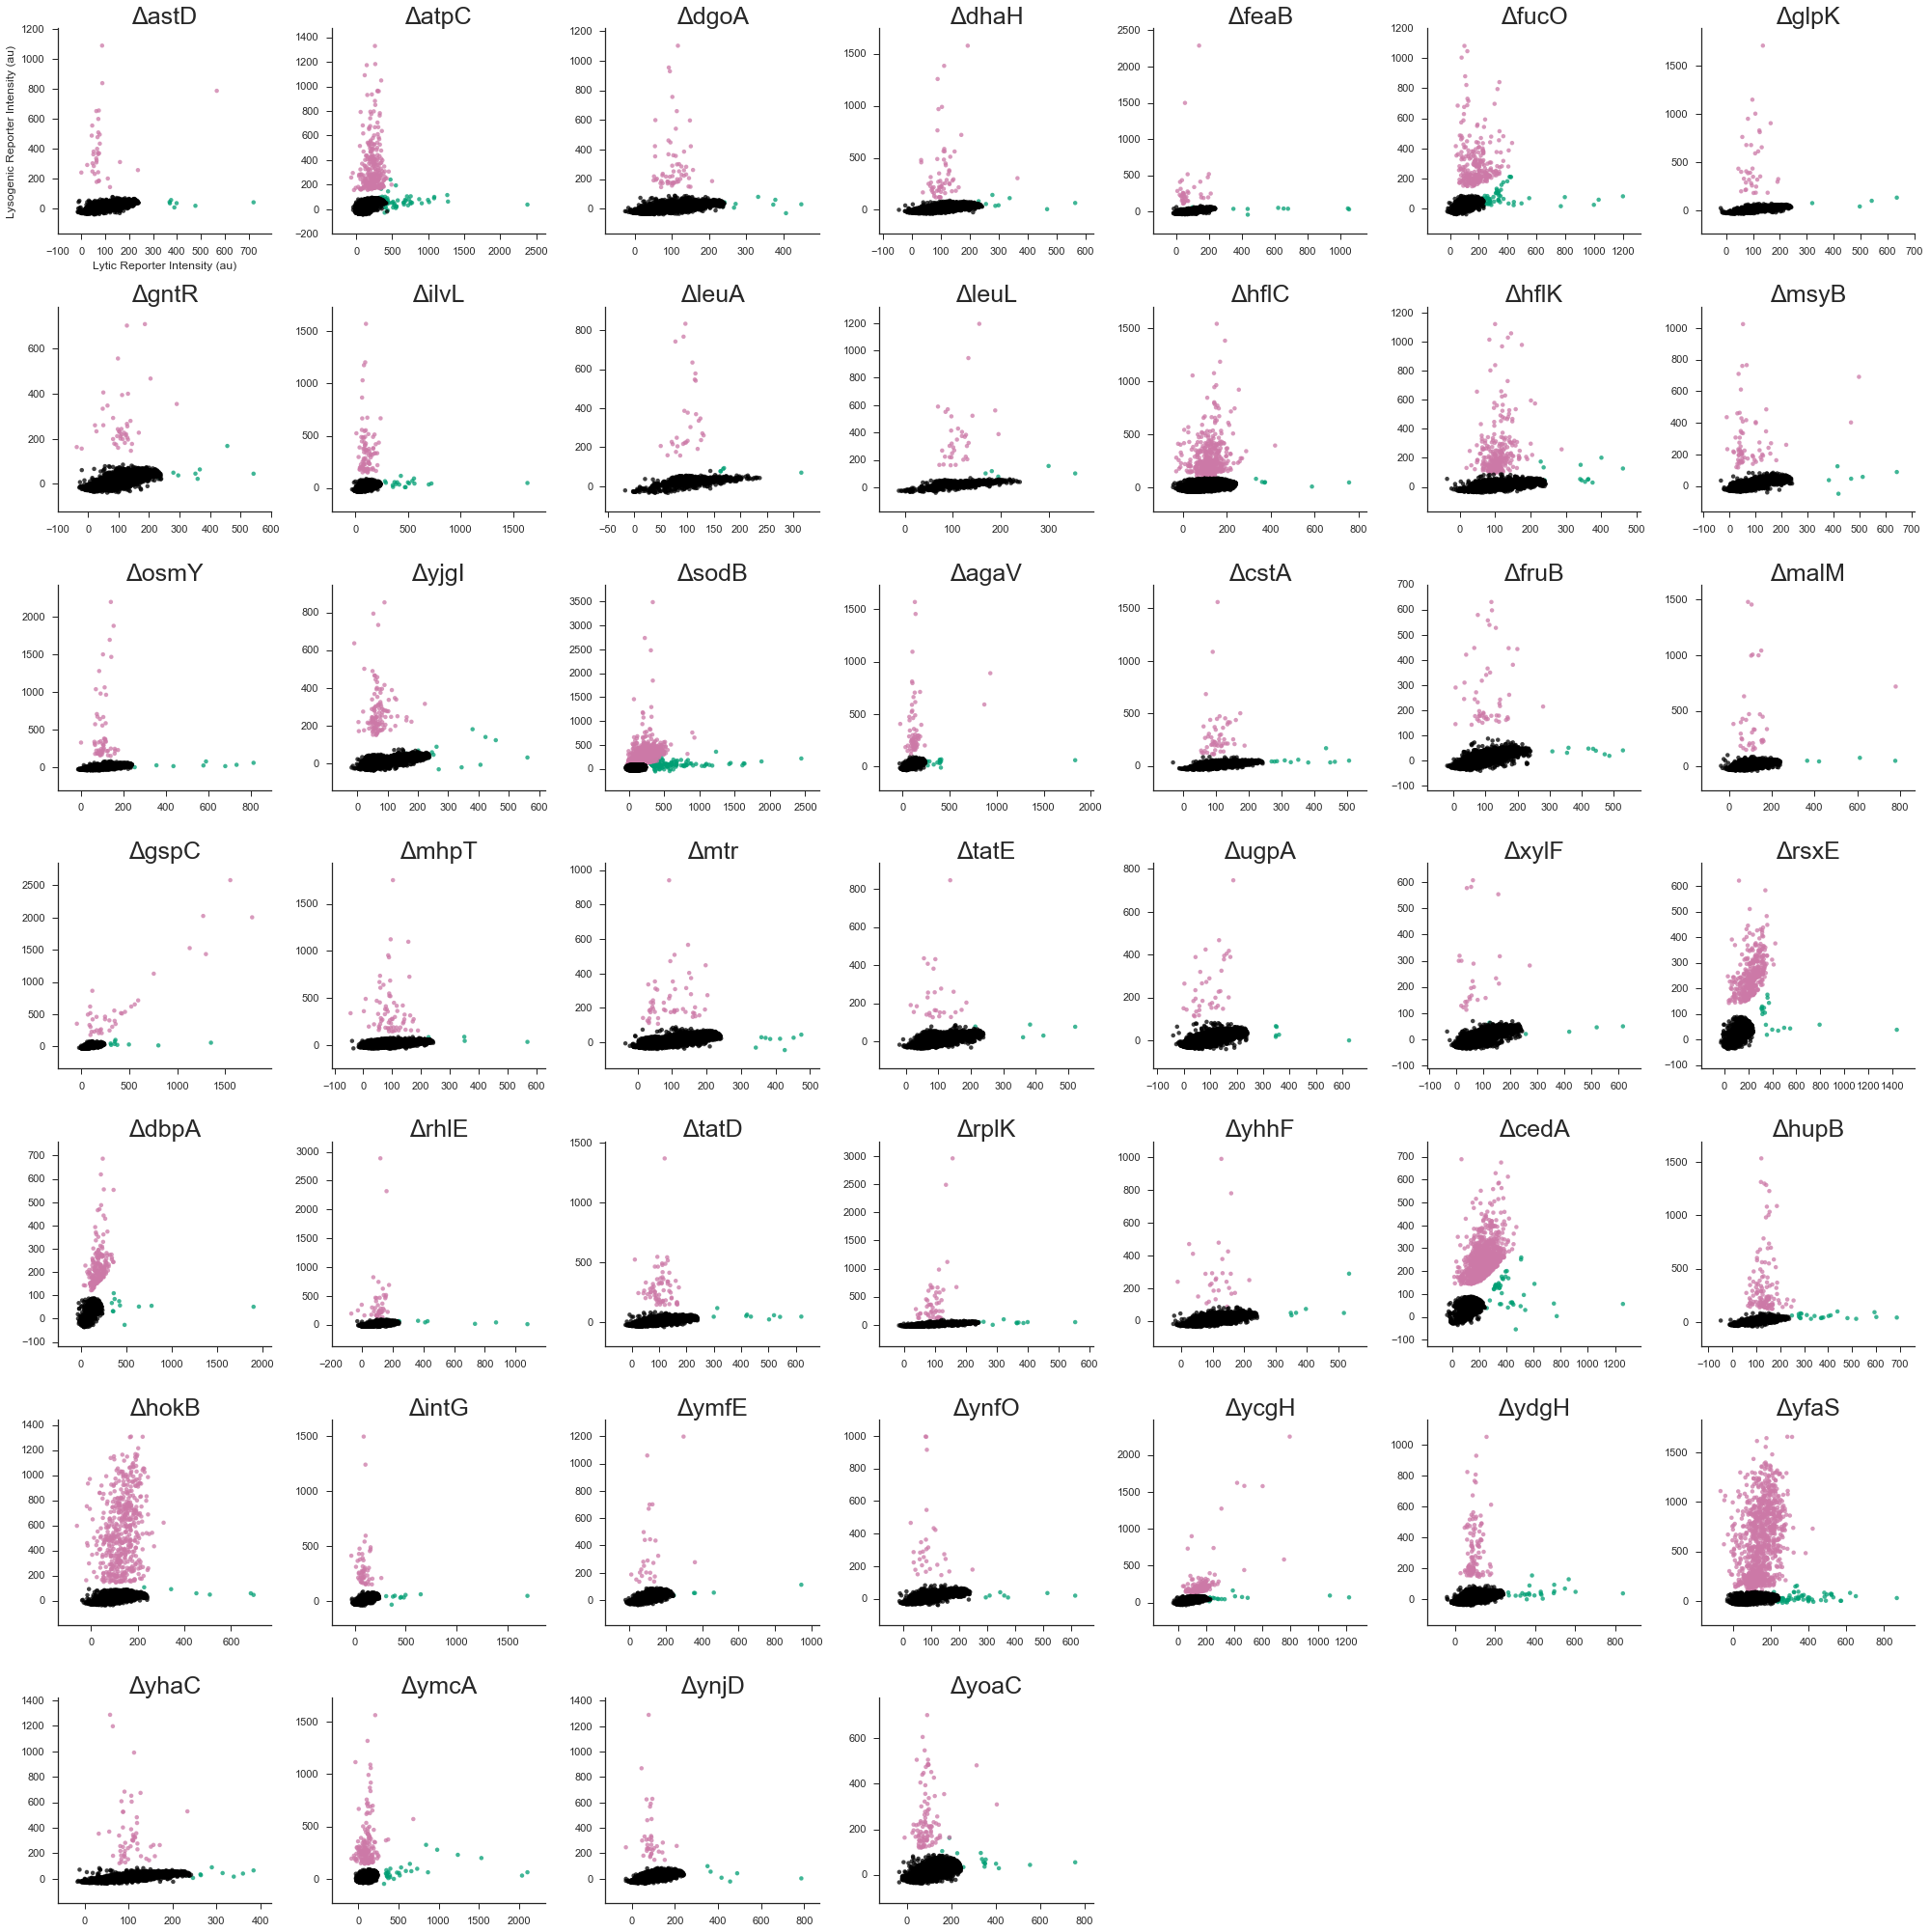

In [32]:
fig, axes = plt.subplots(N_ROWS, N_COLS, figsize = (4*N_ROWS, 4*N_COLS))

index = 0

for row in range(N_ROWS):
	for col in range(N_COLS):
		if index < len(titles):
			title = titles[index]
			lytic_list = zip(*pooled_dict[title][0])
			lyso_list = zip(*pooled_dict[title][1])
			uninfected_list = zip(*pooled_dict[title][2])
			uninfected_list = remove_neg(uninfected_list)
			if len(lytic_list) > 0:
				axes[row,col].scatter(lytic_list[0], lytic_list[1], c = bluish_green, alpha = 0.75, edgecolors = 'none')
			if len(lyso_list) > 0:
				axes[row,col].scatter(lyso_list[0], lyso_list[1], c = reddish_purple, alpha = 0.75, edgecolors = 'none')
			if len(uninfected_list) > 0:
				axes[row,col].scatter(uninfected_list[0], uninfected_list[1], c = black, alpha = 0.75, edgecolors = 'none')
			if row == 0 and col == 0:
				axes[row,col].set_xlabel('Lytic Reporter Intensity (au)')
				axes[row,col].set_ylabel('Lysogenic Reporter Intensity (au)')
			fmt_title = u"\u0394" + title
			axes[row,col].set_xmargin(0.1)
			axes[row,col].set_ymargin(0.1)
			axes[row,col].autoscale(enable = True, axis = 'both', tight = True)
			axes[row,col].set_title(fmt_title, fontsize=25)
			sns.despine()
		else:
			fig.delaxes(axes.flatten()[index])
		index = index + 1

plt.tight_layout()

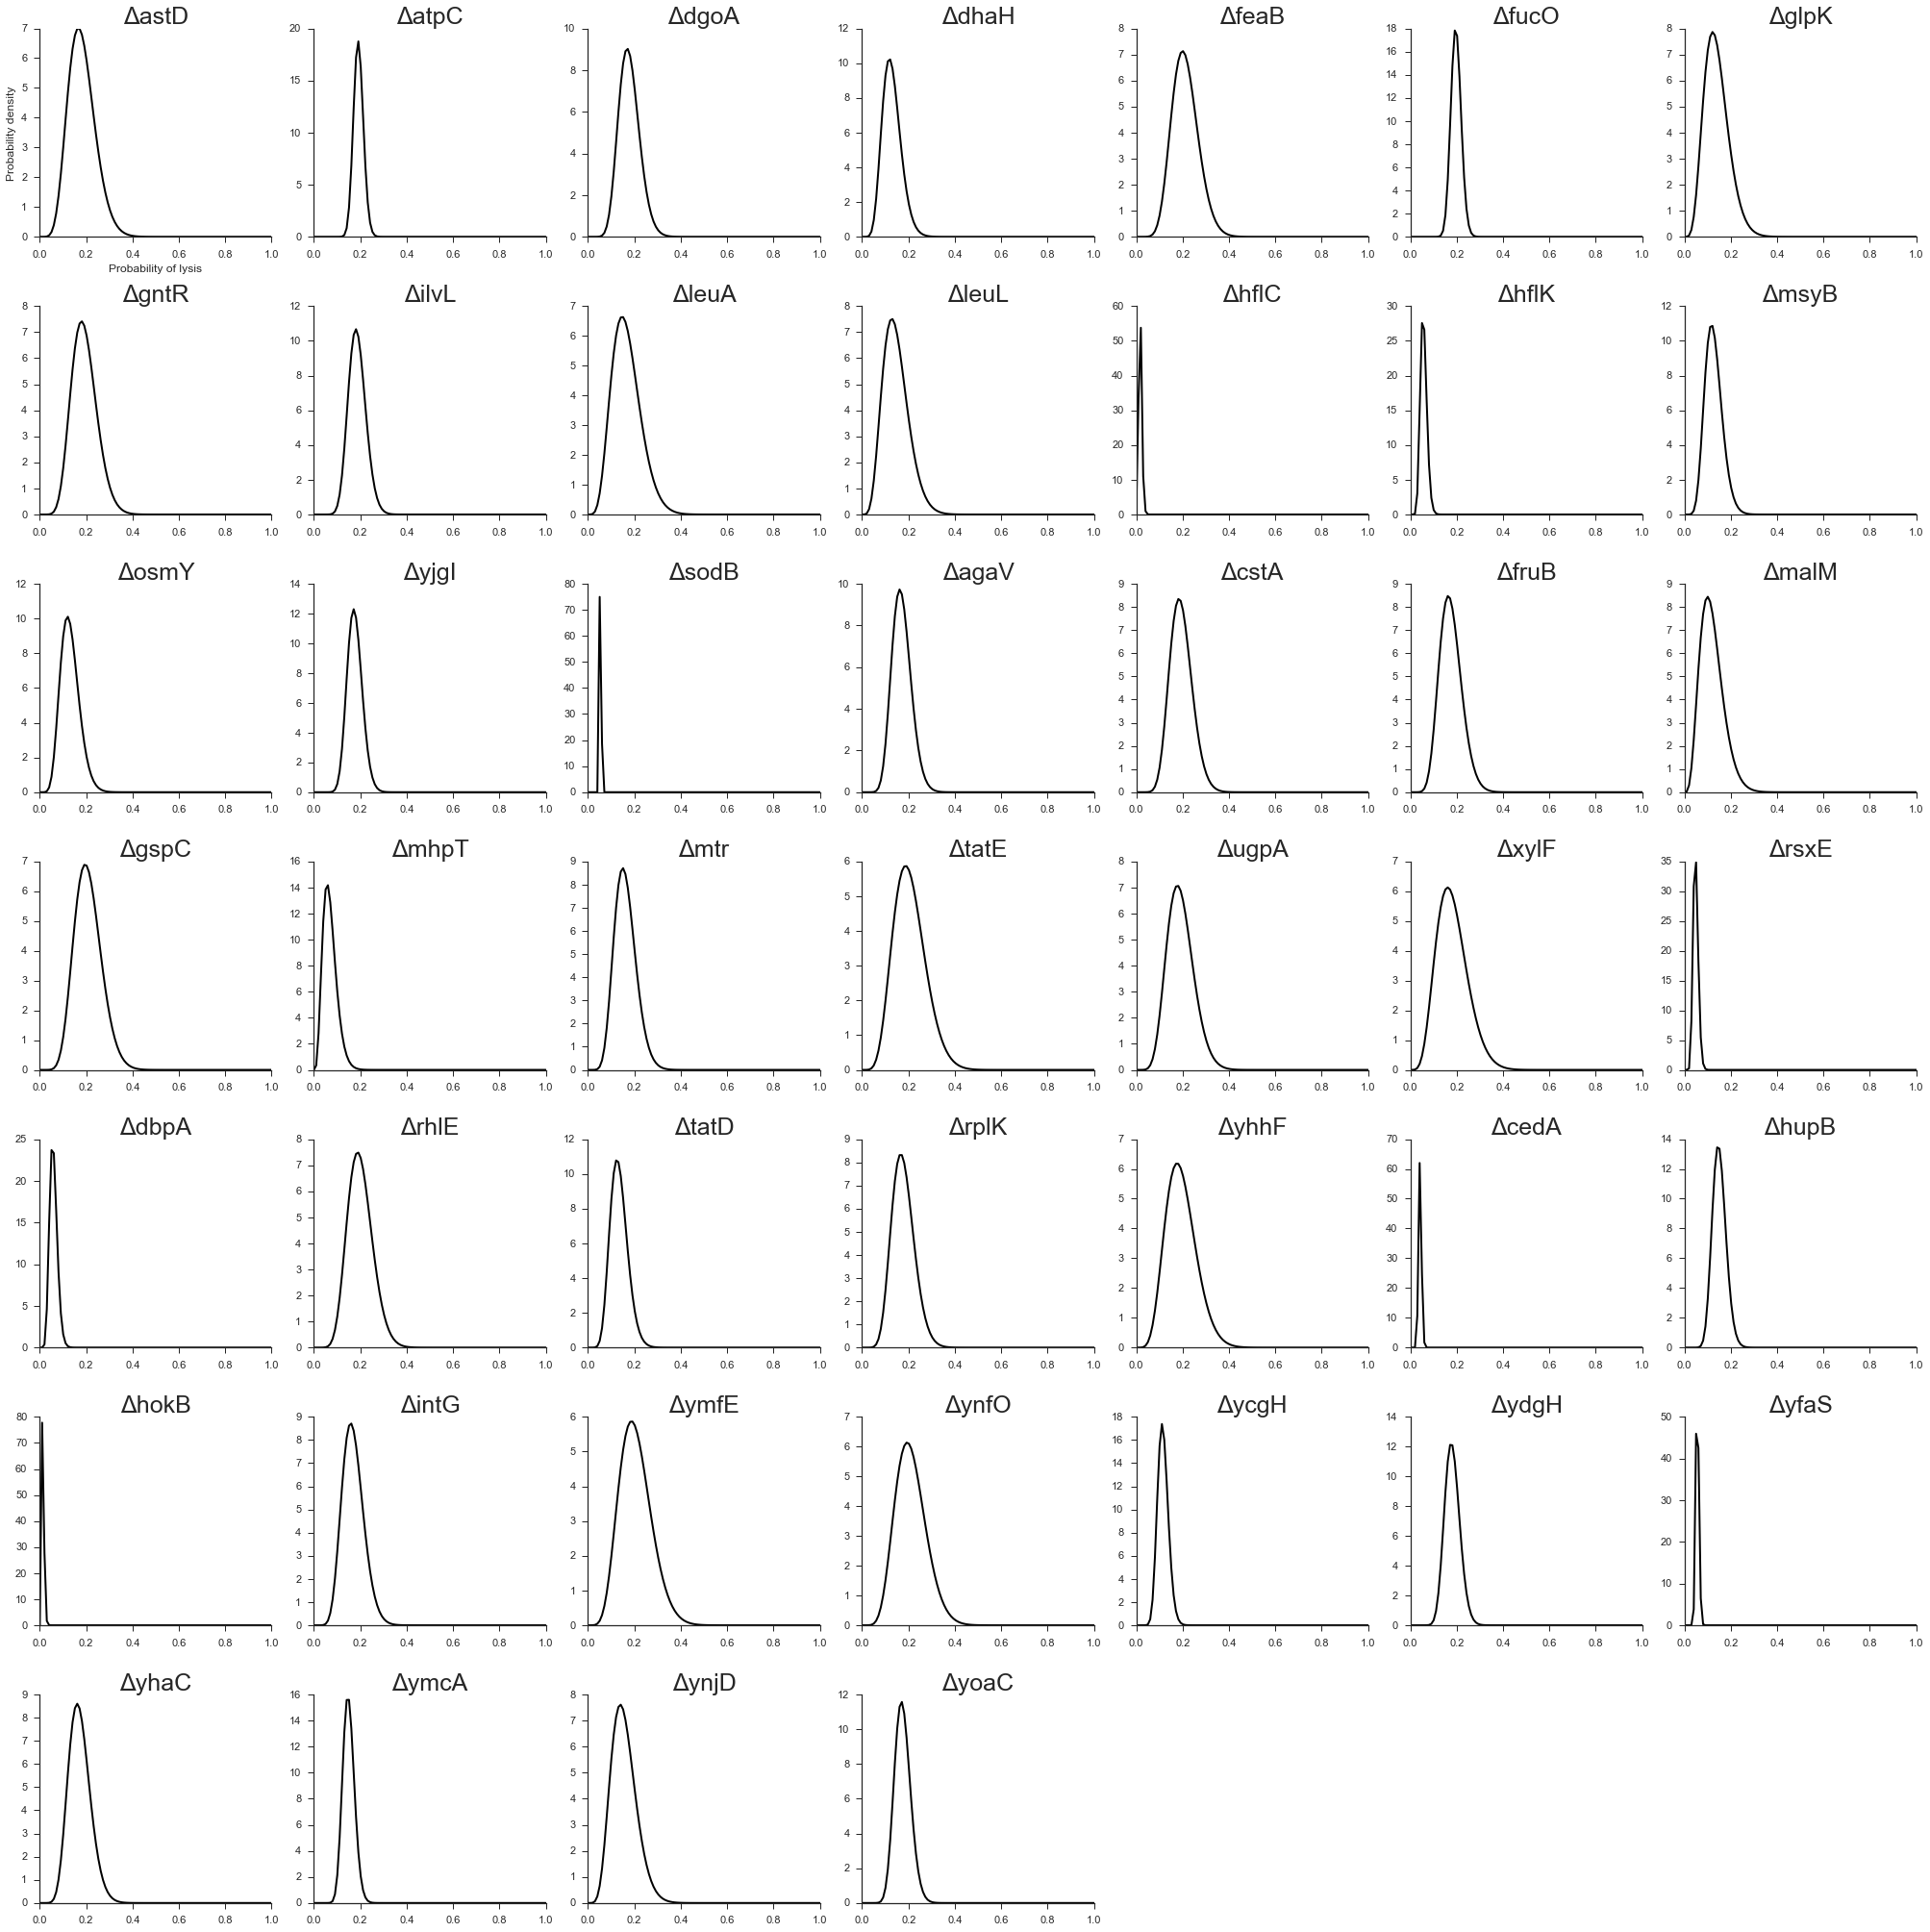

In [38]:
fig, axes = plt.subplots(N_ROWS, N_COLS, figsize = (4*N_ROWS, 4*N_COLS))
index = 0
for row in range(N_ROWS):
    for col in range(N_COLS):
        if index < len(titles):
            title = titles[index]
            lytic_list = zip(*pooled_dict[title][0])
            lyso_list = zip(*pooled_dict[title][1])
            uninfected_list = zip(*pooled_dict[title][2])
            N_lytic = len(lytic_list[0])
            N_lysogenic = len(lyso_list[0])
            x, posterior = compute_p_lysis_posterior(N_lytic, N_lysogenic)
            axes[row, col].plot(x, posterior, color = 'k', linewidth = 2)
            axes[row, col].set_xlim([0, 1])
            fmt_title = u"\u0394" + title
            axes[row, col].set_title(fmt_title, fontsize=25)
            sns.despine()
            
            if row == 0 and col == 0:
                axes[row,col].set_xlabel('Probability of lysis')
                axes[row,col].set_ylabel('Probability density')
        else:
            fig.delaxes(axes.flatten()[index])
        index = index + 1
plt.tight_layout()

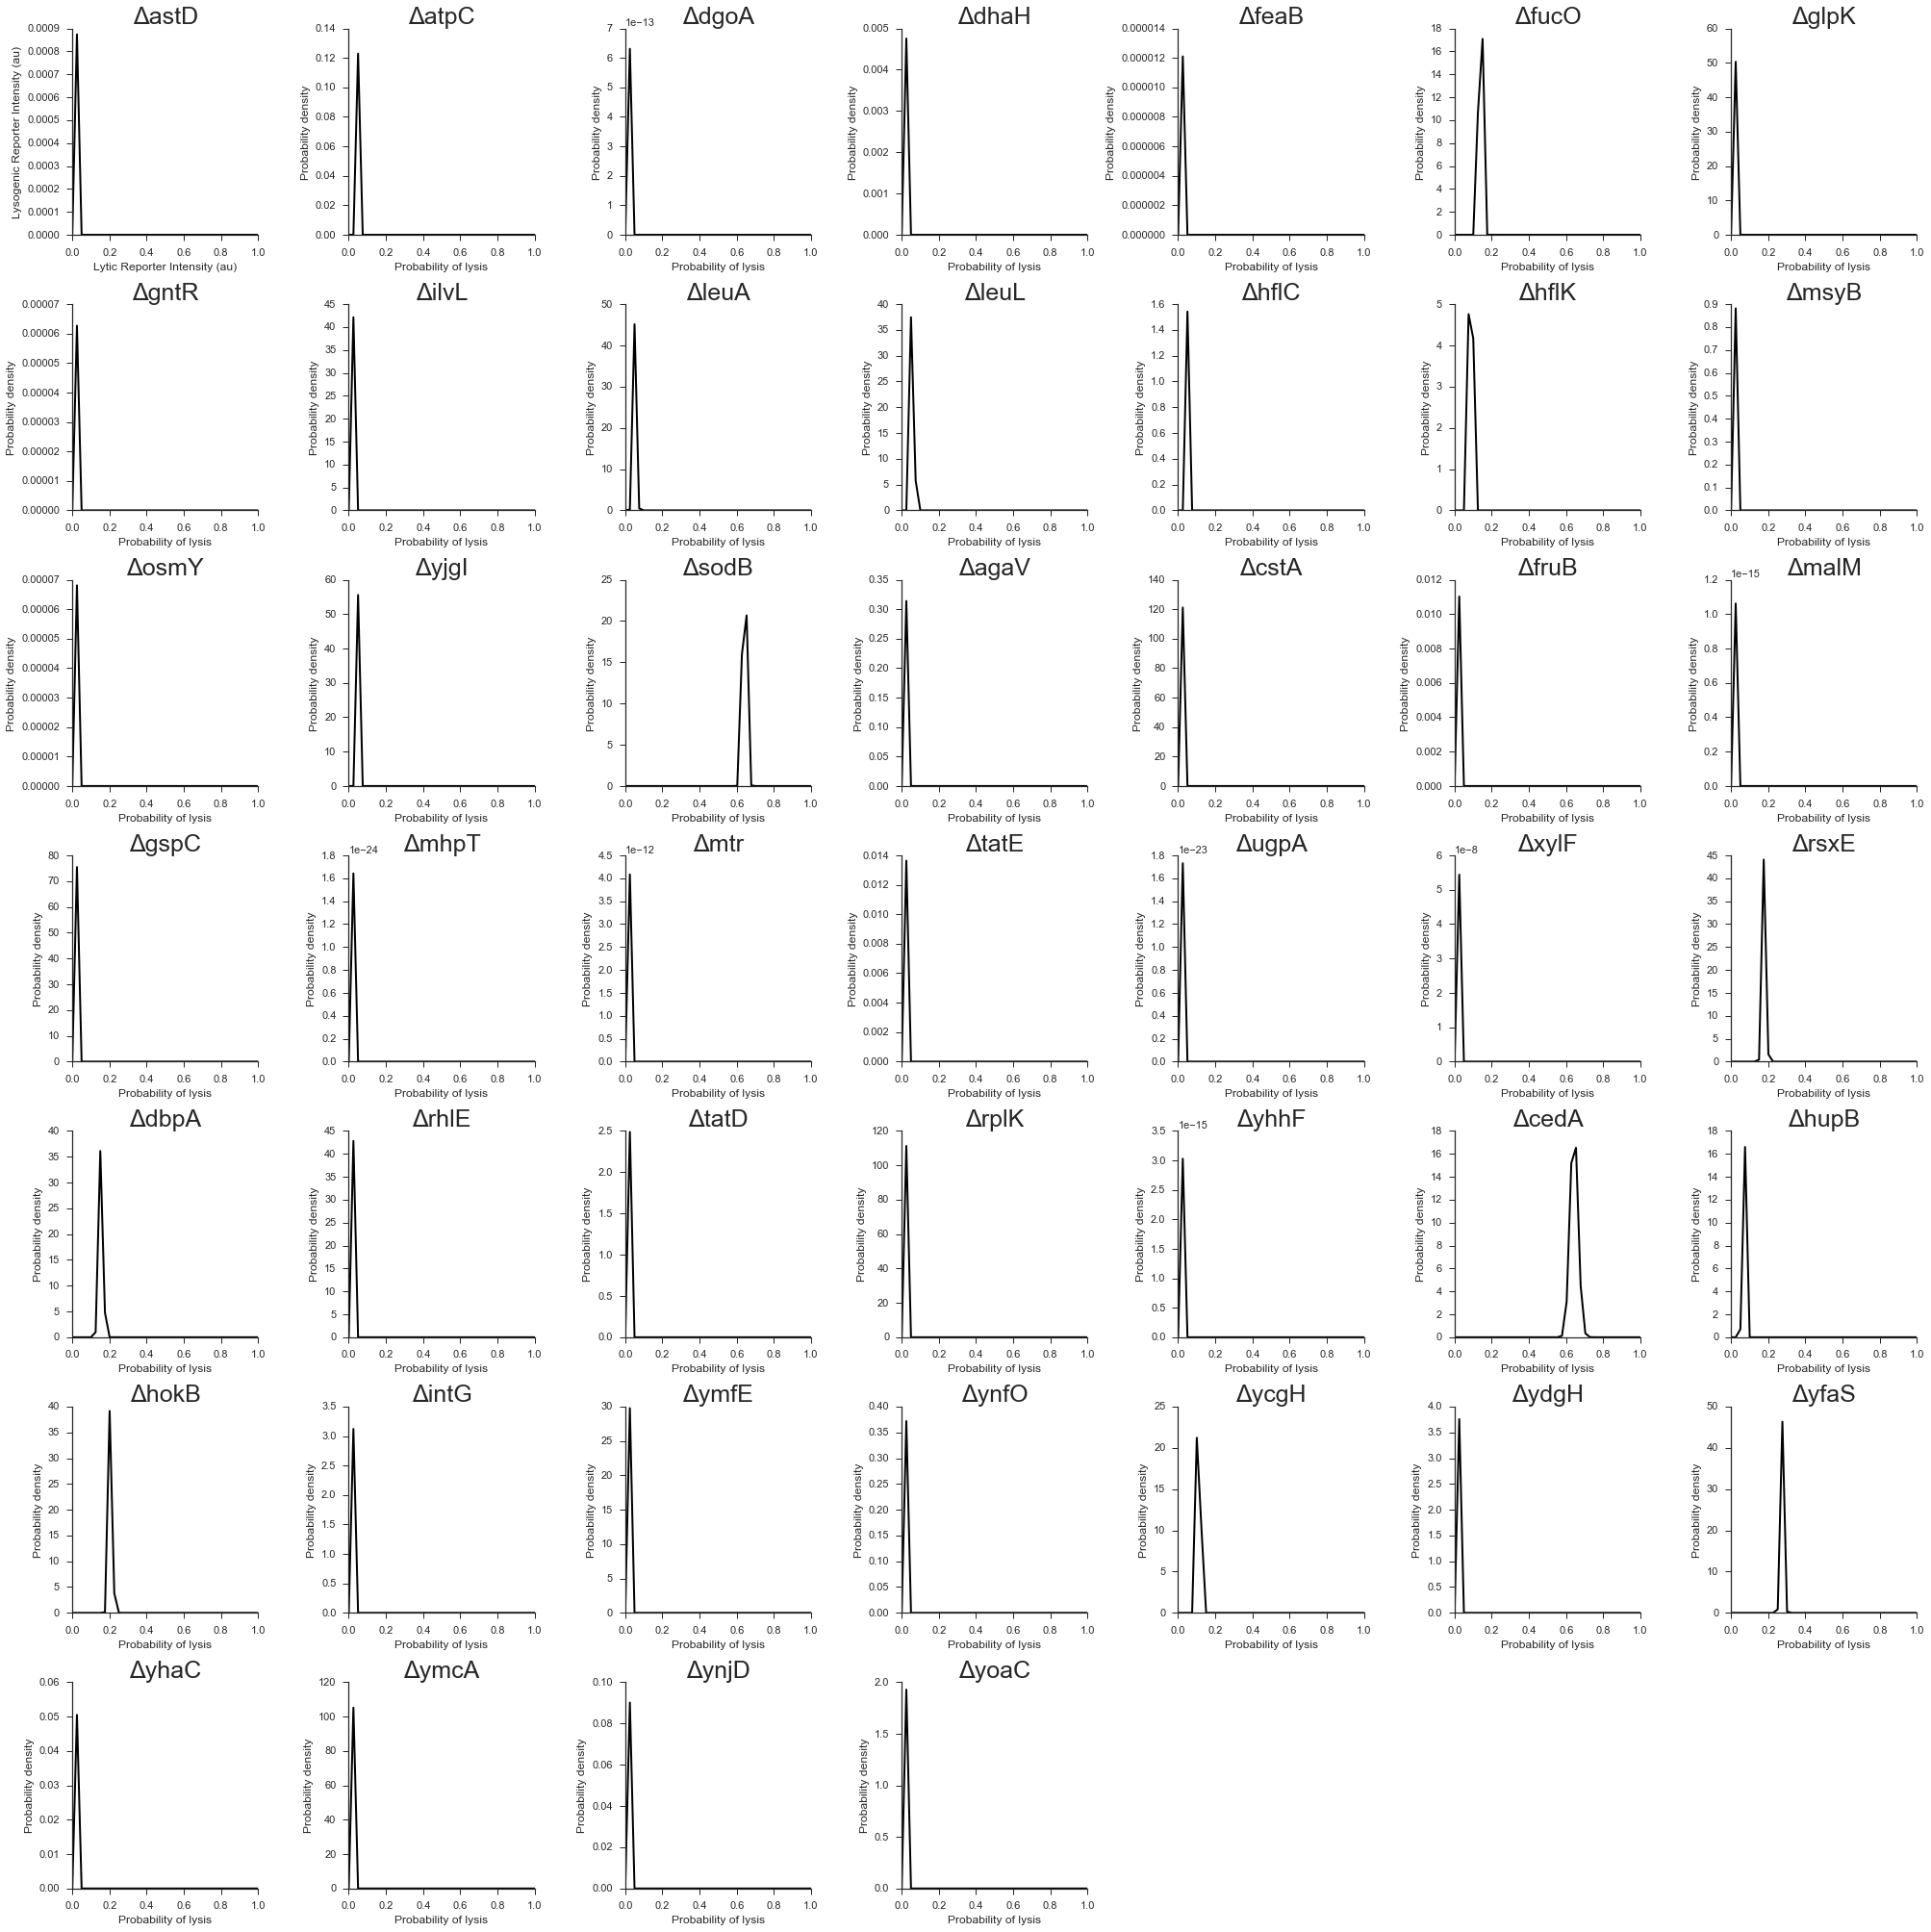

In [39]:
fig, axes = plt.subplots(N_ROWS, N_COLS, figsize = (4*N_ROWS, 4*N_COLS))
index = 0
for row in range(N_ROWS):
    for col in range(N_COLS):
        if index < len(titles):
            title = titles[index]
            lytic_list = zip(*pooled_dict[title][0])
            lyso_list = zip(*pooled_dict[title][1])
            uninfected_list = zip(*pooled_dict[title][2])
            N_lytic = len(lytic_list[0])
            N_lysogenic = len(lyso_list[0])
            N_uninfected = len(uninfected_list[0])
            N_infected = N_lytic + N_lysogenic
            N_cells = N_infected + N_uninfected
            x, posterior = compute_inverse_MOI_posterior(N_infected, N_cells)
            axes[row, col].plot(x, posterior, color = 'k', linewidth = 2)
            axes[row, col].set_xlim([0, 1])
            axes[row, col].set_xlabel('Probability of lysis')
            axes[row, col].set_ylabel('Probability density')
            fmt_title = u"\u0394" + title
            axes[row, col].set_title(fmt_title, fontsize=25)
            sns.despine()
            
            if row == 0 and col == 0:
                axes[row,col].set_xlabel('Lytic Reporter Intensity (au)')
                axes[row,col].set_ylabel('Lysogenic Reporter Intensity (au)')
        else:
            fig.delaxes(axes.flatten()[index])
        index = index + 1
plt.tight_layout()